# This file will explore data of both file

# Read both file data

In [1]:
import pandas as pd


In [2]:
company  = pd.read_excel('Sales.xlsx')
competitor = pd.read_excel('Competitors.xlsx')

In [3]:
company.describe()

,Quantity,Sale
count,12.00000,12.000000
mean,580.00000,58.711650
std,152.06159,15.609208
min,330.00000,30.531600
25%,450.00000,46.260000
50%,580.00000,59.624000
75%,731.25000,69.762650
max,800.00000,82.240000


In [5]:
company.dtypes

Quarter      object
Quantity      int64
Sale        float64
dtype: object

In [6]:
competitor.describe()

,Quantity,Sales
count,4.600000e+01,4.600000e+01
mean,2.847015e+06,1.577141e+06
std,1.607217e+06,8.288000e+05
min,7.103210e+05,3.740611e+05
25%,1.974990e+06,8.904948e+05
50%,2.537260e+06,1.476243e+06
75%,3.275804e+06,1.914063e+06
max,8.837352e+06,4.124948e+06


In [10]:
competitor.dtypes

Year        datetime64[ns]
Quantity             int64
Sales              float64
dtype: object

In [9]:
competitor['Year'] = pd.to_datetime(competitor['Year'], format='%Y-%m')

In [14]:
# Extract the quarter
competitor['Quarter'] = competitor['Year'].dt.to_period("Q")

# Group by quarter and calculate the sum of Quantity and Sales
competitor_edit = competitor.groupby('Quarter').agg({'Quantity': 'sum', 'Sales': 'sum'}).reset_index()


# 1.Data mining

## 1.1 Company

In [15]:
company.describe()

,Quantity,Sale
count,12.00000,12.000000
mean,580.00000,58.711650
std,152.06159,15.609208
min,330.00000,30.531600
25%,450.00000,46.260000
50%,580.00000,59.624000
75%,731.25000,69.762650
max,800.00000,82.240000


In [17]:
#Check null
company.isnull().sum()

Quarter     0
Quantity    0
Sale        0
dtype: int64

###  1.1.2 Plot

In [19]:
import matplotlib.pyplot as plt 
import seaborn as sns

#### Histogram and Box plot

Text(0, 0.5, 'Count')

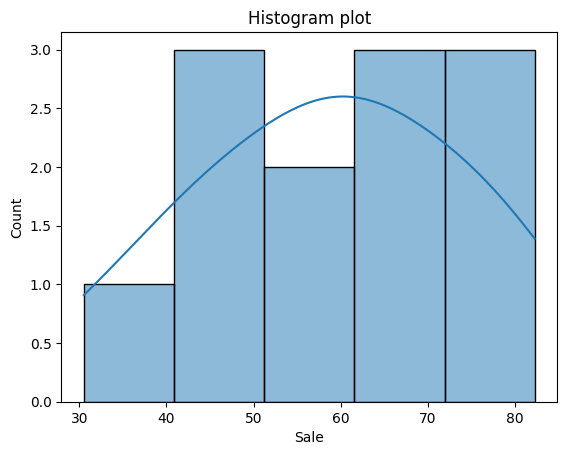

In [24]:
sns.histplot(company['Sale'], kde = True)
plt.title('Histogram plot')
plt.xlabel('Sale')
plt.ylabel('Count')

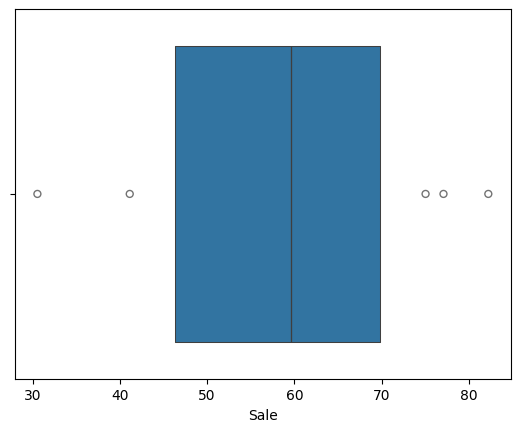

In [26]:
boxplot = sns.boxenplot(x = company['Sale'])

#calculate the interquatile range 
Q1 = company['Sale'].quantile(0.25)
Q3 = company['Sale'].quantile(0.75)
IQR = Q3-Q1

#Definf the upper and lower bound
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

#Defind the outliers
outliers = company['Sale']

## Competitors